# Exploratory Data Analysis (EDA) for Intel Image Classification Dataset

## About the Dataset

### Context

This dataset contains image data of natural scenes from various locations around the world. It was initially published on the Analytics Vidhya DataHack platform as part of an image classification challenge by Intel.

### Content

The dataset consists of approximately 25,000 images, each resized to 150x150 pixels, categorized into six classes:

| Class     | Label |
|-----------|-------|
| Buildings | 0     |
| Forest    | 1     |
| Glacier   | 2     |
| Mountain  | 3     |
| Sea       | 4     |
| Street    | 5     |

The dataset is structured into three parts:

- **Train**: ~14,000 images for training models.
- **Test**: ~3,000 images for testing.
- **Prediction**: ~7,000 images for model evaluation.


## Loading the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from tqdm import tqdm

In [3]:
train_path = '../data/seg_train/'
test_path = '../data/seg_test/'

def load_images(path):

    X = []
    y = []

    for folder in os.listdir(path):
        files = os.listdir(path + folder)
        for file in tqdm(files):
            img = cv2.imread(path + folder + '/' + file)
            img = cv2.resize(img, (150, 150))
            X.append(img)
            y.append(folder)
    
    X = np.array(X)
    y = np.array(y)

    return X, y

X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)

# Checking the shape of the dataset
print()
print("Shape of the training set: ", X_train.shape)
print("Shape of the testing set: ", X_test.shape)
print("Number of images in the training set: ", X_train.shape[0])
print("Number of images in the testing set: ", X_test.shape[0])

100%|██████████| 437/437 [00:00<00:00, 3062.62it/s]


Shape of the training set:  (14034, 150, 150, 3)
Shape of the testing set:  (3000, 150, 150, 3)
Number of images in the training set:  14034
Number of images in the testing set:  3000


In [4]:
classes_names = np.unique(y_train)
print("Classes: ", classes_names)
print("Number of classes: ", len(classes_names))

Classes:  ['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Number of classes:  6


## Destribution of the Classes

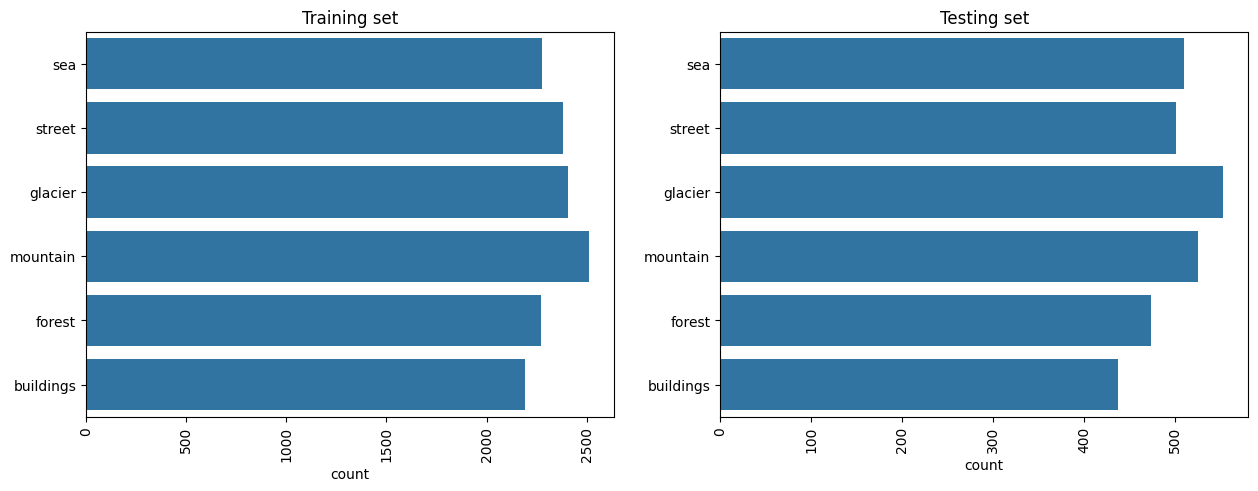

In [6]:
# compare number of images in each class in the training set and testing set, in the same graph
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(y_train)
plt.title('Training set')
plt.xticks(rotation=90)
plt.subplot(1, 2, 2)
sns.countplot(y_test)
plt.title('Testing set')
plt.xticks(rotation=90)
plt.show()


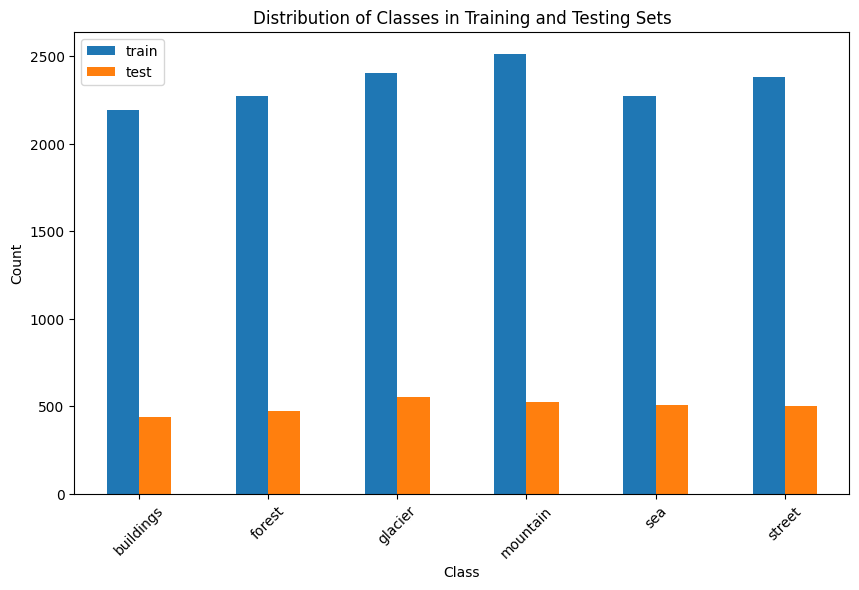

In [7]:
_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
df_counts = pd.DataFrame({'train': train_counts, 'test': test_counts}, index=classes_names)
df_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Classes in Training and Testing Sets')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
plt.show()


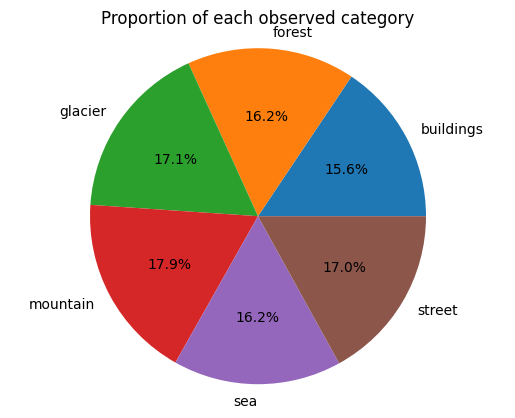

In [8]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0, 0, 0) , 
        labels=classes_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()



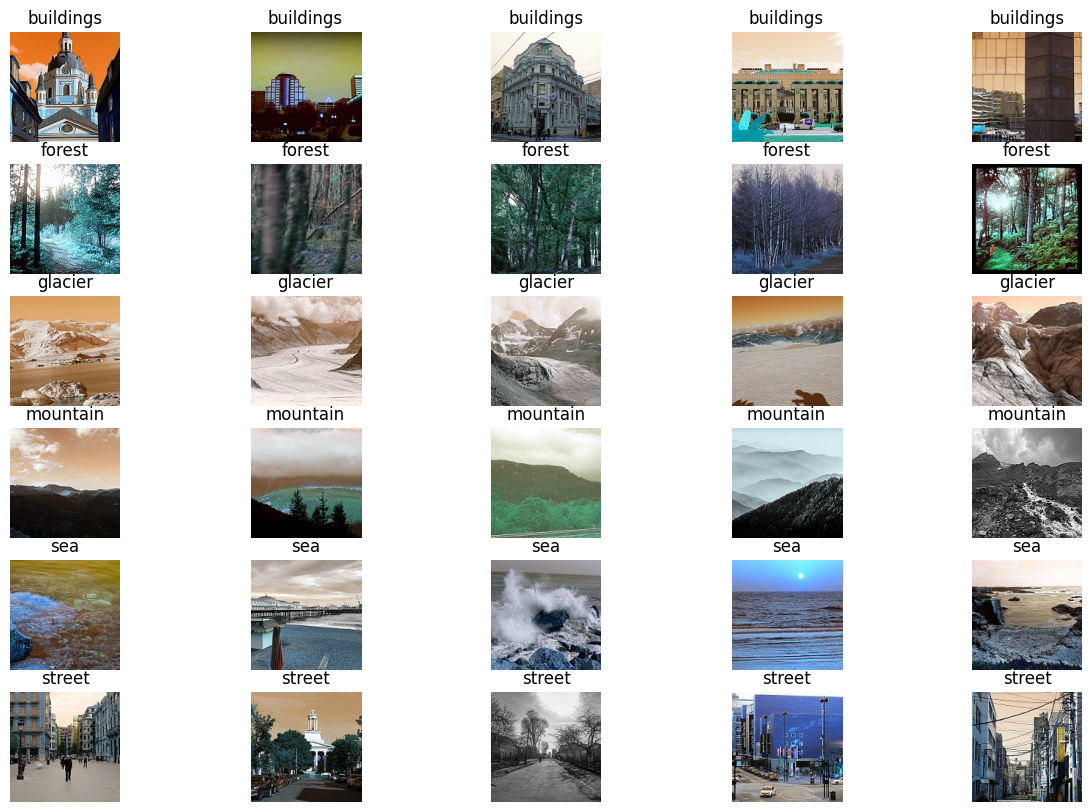

In [9]:
def display_random_images(X, y, classes_names, number_of_images=5):
    plt.figure(figsize=(15, 10))

    for class_name in classes_names:
        for i in range(number_of_images):
            plt.subplot(len(classes_names), number_of_images, number_of_images * list(classes_names).index(class_name) + i + 1)
            plt.imshow(X[y == class_name][np.random.randint(0, len(X[y == class_name]))])
            plt.title(class_name)
            plt.axis('off')
    
    plt.show()

display_random_images(X_train, y_train, classes_names)

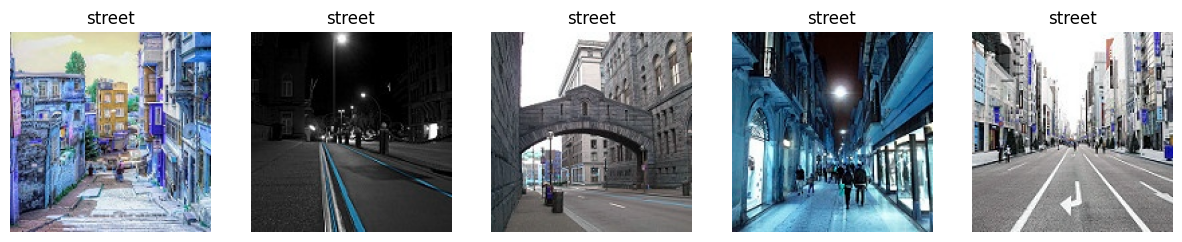

In [11]:
def display_images_of_class(X, y, class_name, number_of_images=5):
    plt.figure(figsize=(15, 10))

    for i in range(number_of_images):
        plt.subplot(1, number_of_images, i + 1)
        plt.imshow(X[y == class_name][i])
        plt.title(class_name)
        plt.axis('off')
    
    plt.show()

display_images_of_class(X_train, y_train, 'street')

Im going save the date in .npy file to load it faster in the future
To load the data, we will use the `np.load` function from the NumPy library.

In [12]:
np.save('../data/X_train.npy', X_train)
np.save('../data/y_train.npy', y_train)
np.save('../data/X_test.npy', X_test)
np.save('../data/y_test.npy', y_test)